<a href="https://colab.research.google.com/github/baixabhi/Forecasting-Potential-Growth-of-Mobile-Application/blob/main/Googleplay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.model_selection import GridSearchCV
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score




%matplotlib inline
init_notebook_mode(connected=True)

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df_apps = pd.read_csv('/content/drive/MyDrive/ML_PROJECTS/googleplaystore.csv')

In [3]:
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df_apps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
categories = list(df_apps["Category"].unique())
print("There are {0:.0f} categories! (Excluding/Removing Category 1.9)".format(len(categories)-1))
print(categories)
#Remove Category 1.9
categories.remove('1.9')

There are 33 categories! (Excluding/Removing Category 1.9)
['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', '1.9']


In [7]:
mislabeled_apps = df_apps.loc[df_apps["Category"] == "1.9"]

print("Mislabeled apps:")
print(mislabeled_apps.head())

if len(mislabeled_apps) > 0:
    print("This mislabeled app category affects {} apps.".format(len(mislabeled_apps)))
    print("Indexes of mislabeled apps:", mislabeled_apps.index.values)
    print("These entries will be removed or corrected.")

    df_apps = df_apps.drop(mislabeled_apps.index, axis=0)

print("DataFrame updated with corrections or removals.")
print(df_apps.head())

Mislabeled apps:
                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN  
This mislabeled app category affects 1 apps.
Indexes of mislabeled apps: [10472]
These entries will be removed or corrected.
DataFrame updated with corrections or removals.
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pix

In [8]:
df_apps['Rating'].isnull().sum()

1474

In [9]:
df_apps = df_apps.drop(df_apps[df_apps['Rating'].isnull()].index, axis=0)

In [10]:
categ = list(df_apps["Category"].unique())
print("There are {0:.0f} categories!".format(len(categ)-1))
print(categ)

There are 32 categories!
['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']


In [11]:
import plotly.graph_objs as go

ratings_counts = df_apps['Rating'].value_counts().sort_index()

layout = go.Layout(
    title='Distribution of App Ratings',
    xaxis=dict(title='Ratings'),
    yaxis=dict(title='Number of Apps')
)

data = [go.Bar(x=ratings_counts.index, y=ratings_counts.values)]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='rating_distribution_bar_chart')


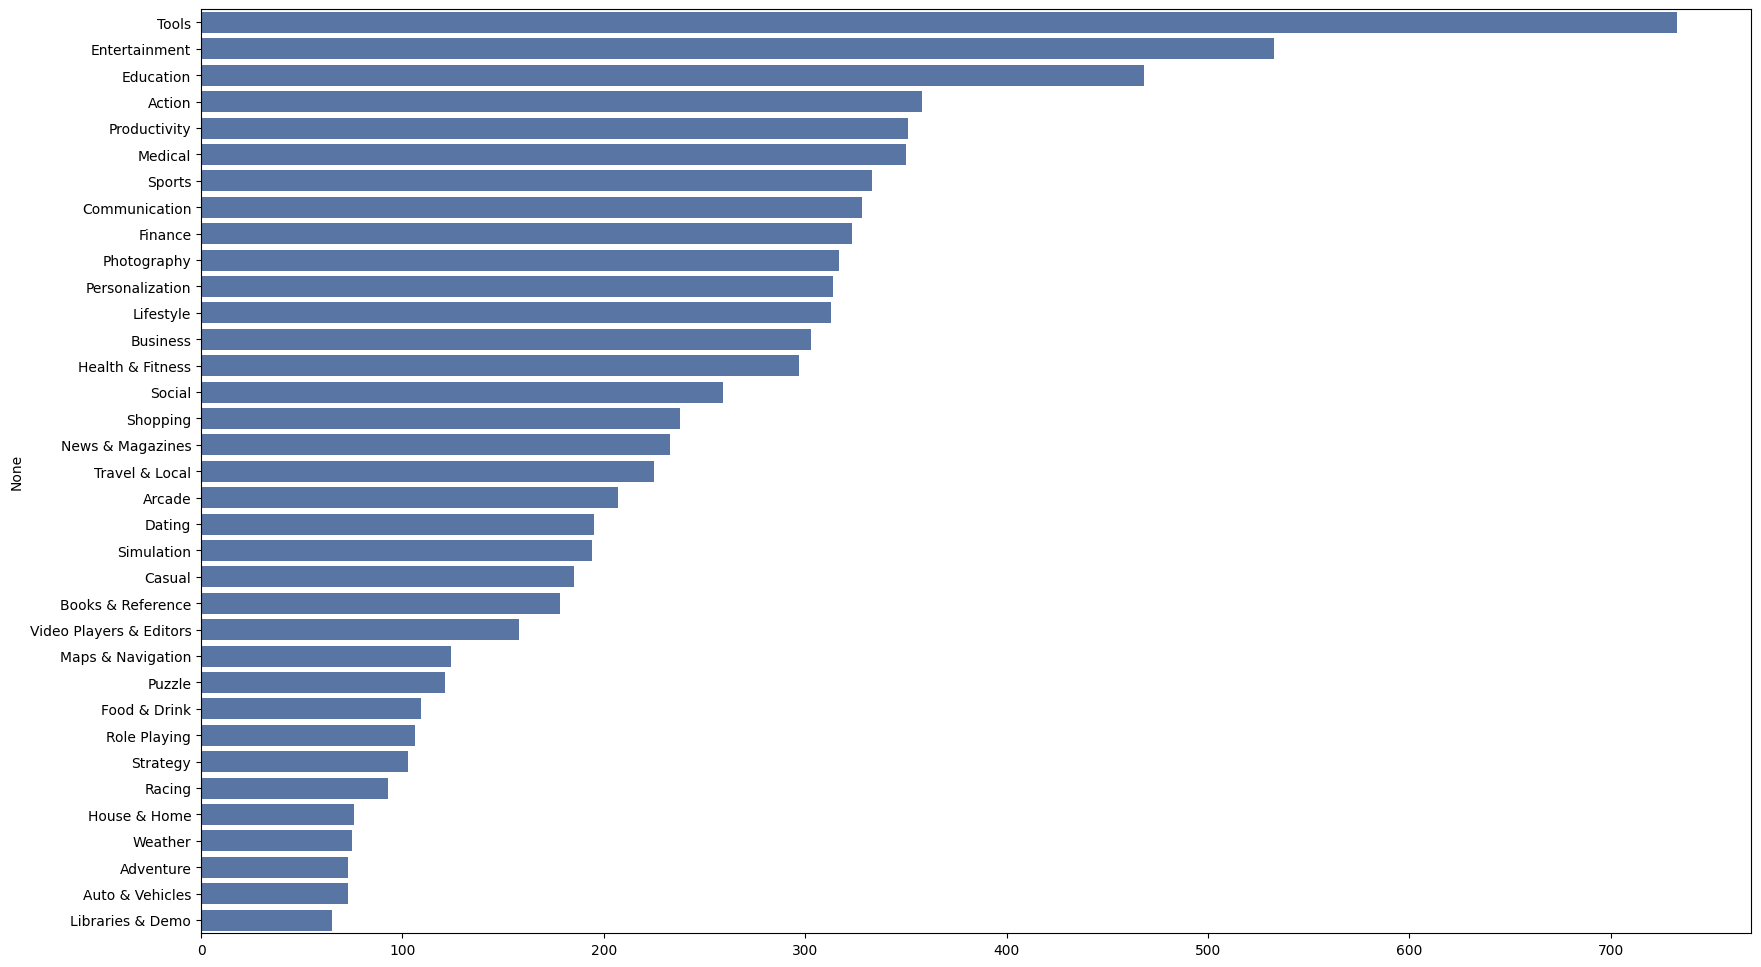

In [12]:
custom_palette = ["#4C72B0", "#55A868", "#C44E52", "#8172B3", "#CCB974", "#64B5CD"]  # Example custom colors

plt.figure(figsize=(20, 12))
genres = df_apps["Genres"].value_counts()[:35]
sns.set_palette(custom_palette)  # Set the custom color palette
ax = sns.barplot(x=genres.values, y=genres.index)

plt.show()

<ipython-input-13-67fb02a671e6>:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



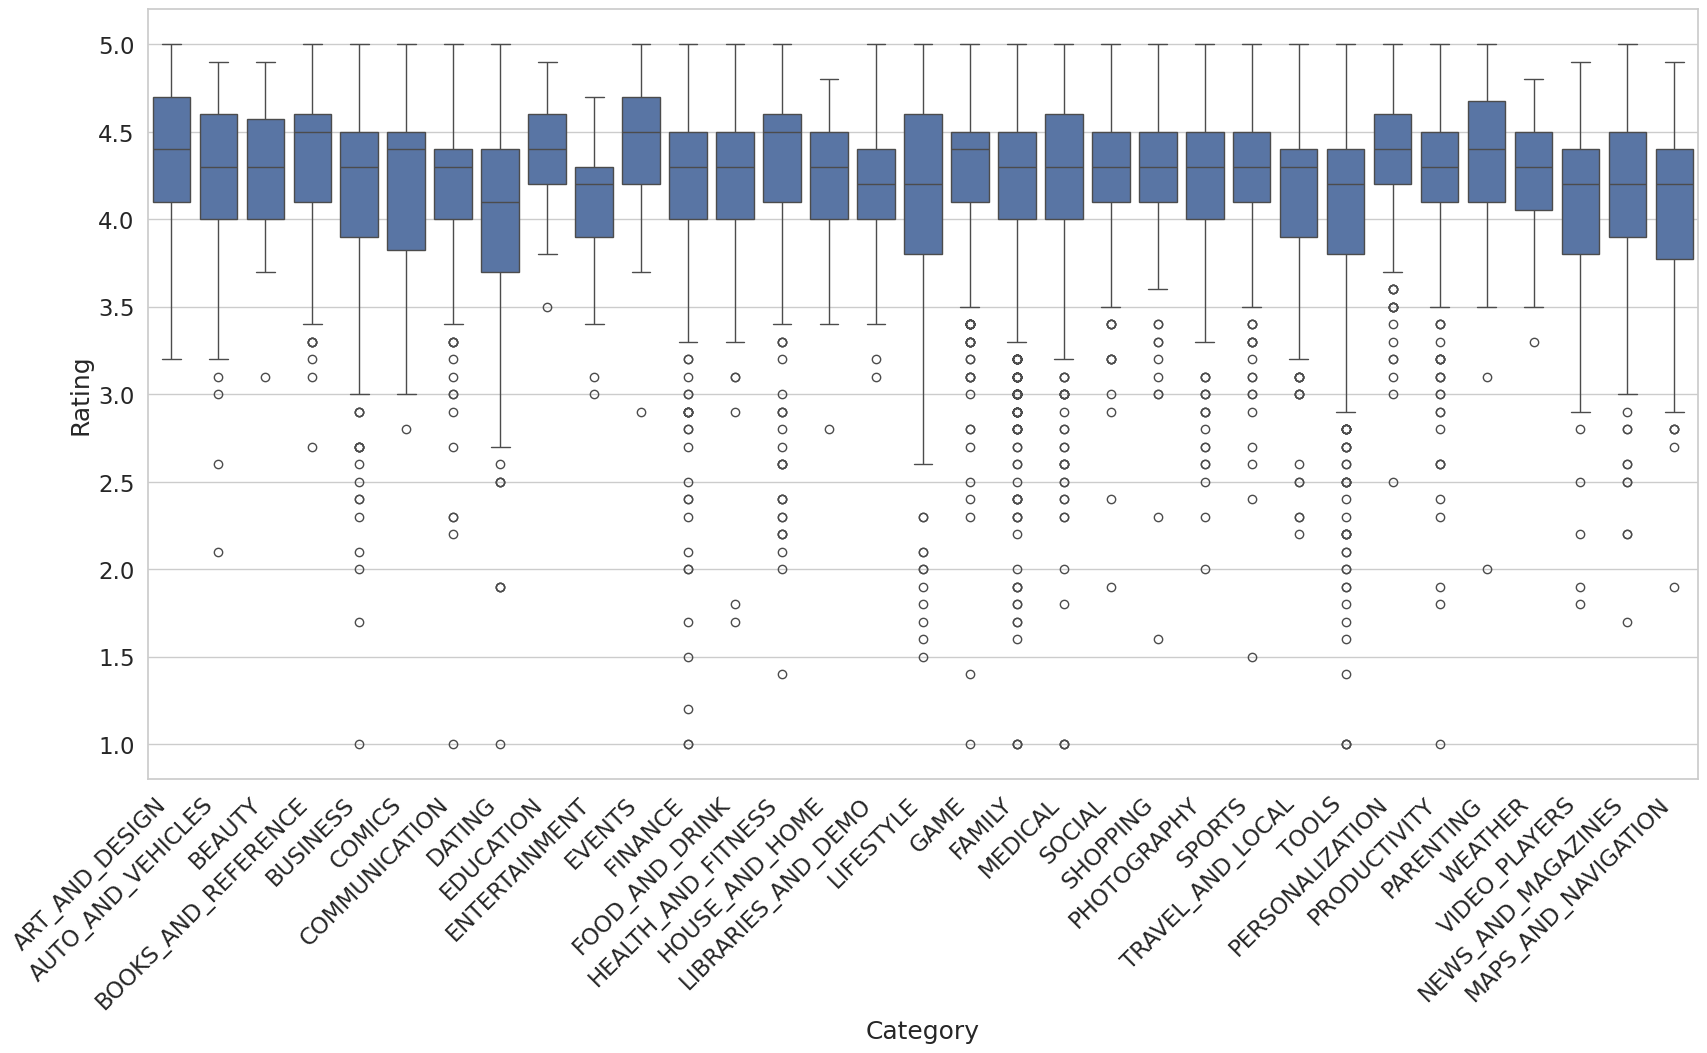

In [13]:
#Finding categories with best overall rating and most installs
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.5, style='whitegrid')
ax = sns.boxplot(x="Category",y="Rating",data=df_apps)
labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')

In [14]:
#removing rows with rating < 4.0
highRating = df_apps.copy()
highRating = highRating.loc[highRating["Rating"] >= 4.0]
highRateNum = highRating.groupby('Category')['Rating'].nunique()
highRateNum

Category
ART_AND_DESIGN         10
AUTO_AND_VEHICLES       8
BEAUTY                 10
BOOKS_AND_REFERENCE    11
BUSINESS               11
COMICS                 10
COMMUNICATION          10
DATING                 11
EDUCATION              10
ENTERTAINMENT           8
EVENTS                 11
FAMILY                 11
FINANCE                11
FOOD_AND_DRINK         10
GAME                   11
HEALTH_AND_FITNESS     11
HOUSE_AND_HOME          9
LIBRARIES_AND_DEMO      9
LIFESTYLE              11
MAPS_AND_NAVIGATION    10
MEDICAL                11
NEWS_AND_MAGAZINES     11
PARENTING              11
PERSONALIZATION        11
PHOTOGRAPHY            11
PRODUCTIVITY           11
SHOPPING               10
SOCIAL                 11
SPORTS                 11
TOOLS                  11
TRAVEL_AND_LOCAL       10
VIDEO_PLAYERS          10
WEATHER                 9
Name: Rating, dtype: int64

<Axes: >

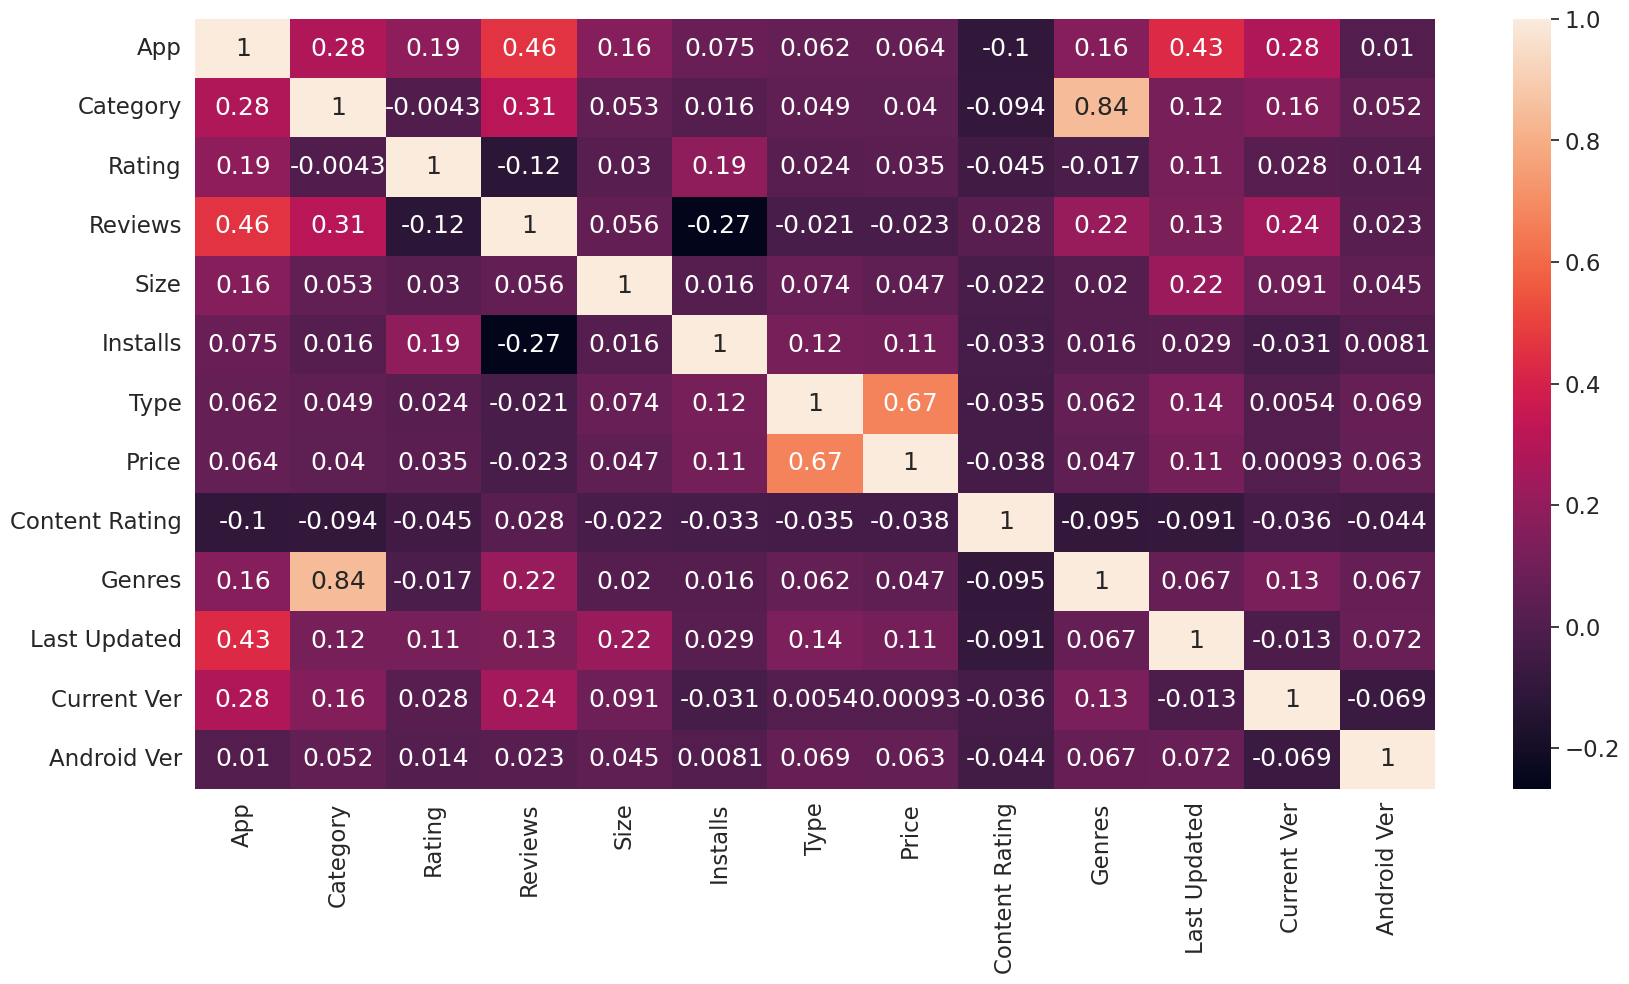

In [15]:
df_apps.dtypes
df_apps["Type"] = (df_apps["Type"] == "Paid").astype(int)
corr = df_apps.apply(lambda x: x.factorize()[0]).corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True)

In [16]:
col = "Type"
grouped = df_apps[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plotting
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0])
layout = {'title': 'Target(0 = No, 1 = Yes)'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [17]:
col = "Category"
grouped = df_apps[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0])
layout = {'title': 'Target(0 = No, 1 = Yes)'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [18]:
#Extract App, Installs, & Content Rating from df_apps
popApps = df_apps.copy()
popApps = popApps.drop_duplicates()
#Remove characters preventing values from being floats and integers

popApps["Price"] = popApps["Price"].str.replace("$","")
popApps["Price"] = popApps["Price"].astype("float64")
popApps["Installs"] = popApps["Installs"].str.replace("+","")
popApps["Installs"] = popApps["Installs"].str.replace(",","")
popApps["Installs"] = popApps["Installs"].astype("int64")
popApps["Size"] = popApps["Size"].str.replace("Varies with device","0")
popApps["Size"] = (popApps["Size"].replace(r'[kM]+$', '', regex=True).astype(float) *\
        popApps["Size"].str.extract(r'[\d\.]+([kM]+)', expand=False).fillna(1).replace(['k','M'], [10**3, 10**6]).astype(int))
popApps["Reviews"] = popApps["Reviews"].astype("int64")

popApps = popApps.sort_values(by="Installs",ascending=False)
popApps.reset_index(inplace=True)
popApps.drop(["index"],axis=1,inplace=True)
popApps.loc[:40,['App','Installs','Content Rating']]

<ipython-input-18-ba0494251862>:6: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

<ipython-input-18-ba0494251862>:8: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,App,Installs,Content Rating
0,Messenger – Text and Video Chat for Free,1000000000,Everyone
1,Google Drive,1000000000,Everyone
2,Instagram,1000000000,Teen
3,Google,1000000000,Everyone
4,Instagram,1000000000,Teen
5,Google+,1000000000,Teen
6,Subway Surfers,1000000000,Everyone 10+
7,Maps - Navigate & Explore,1000000000,Everyone
8,Google,1000000000,Everyone
9,Hangouts,1000000000,Everyone


In [19]:
popAppsCopy = popApps.copy()
label_encoder = preprocessing.LabelEncoder()

popAppsCopy['Category']= label_encoder.fit_transform(popAppsCopy['Category'])
popAppsCopy['Content Rating']= label_encoder.fit_transform(popAppsCopy['Content Rating'])
popAppsCopy['Genres']= label_encoder.fit_transform(popAppsCopy['Genres'])
popAppsCopy.dtypes

App                object
Category            int64
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type                int64
Price             float64
Content Rating      int64
Genres              int64
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [20]:
#dropping unncessary data
popAppsCopy = popAppsCopy.drop(["App","Last Updated","Current Ver","Android Ver"],axis=1)
print("There are {} total rows.".format(popAppsCopy.shape[0]))
countPop = popAppsCopy[popAppsCopy["Installs"] > 100000].count()
print("{} Apps are Popular!".format(countPop[0]))
print("{} Apps are Unpopular!\n".format((popAppsCopy.shape[0]-countPop)[0]))
print("For an 80-20 training/test split, we need about {} apps for testing\n".format(popAppsCopy.shape[0]*.20))
popAppsCopy["Installs"] = (popAppsCopy["Installs"] > 100000)*1 #Installs Binarized

testPop1 = popAppsCopy[popAppsCopy["Installs"] == 1].sample(1010,random_state=0)
popAppsCopy = popAppsCopy.drop(testPop1.index)

testPop0 = popAppsCopy[popAppsCopy["Installs"] == 0].sample(766,random_state=0)
popAppsCopy = popAppsCopy.drop(testPop0.index)


testDf = testPop1.append(testPop0)
trainDf = popAppsCopy
testDf = testDf.sample(frac=1,random_state=0).reset_index(drop=True)
trainDf = trainDf.sample(frac=1,random_state=0).reset_index(drop=True)

y_train = trainDf.pop("Installs")
X_train = trainDf.copy()
y_test = testDf.pop("Installs")
X_test = testDf.copy()

There are 8892 total rows.
4568 Apps are Popular!
4324 Apps are Unpopular!

For an 80-20 training/test split, we need about 1778.4 apps for testing



<ipython-input-20-5d959d3c7d8c>:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [21]:
learning_rate = 0.06

xgb_classifier = xgb.XGBClassifier(learning_rate=learning_rate)
xgb_classifier.fit(X_train, y_train)

train_accuracy = xgb_classifier.score(X_train, y_train)
test_accuracy = xgb_classifier.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9630410342889264
Testing Accuracy: 0.9577702702702703


In [22]:
rf_model = RandomForestClassifier(random_state=0)

rf_model.fit(X_train, y_train)


rf_predicted = rf_model.predict(X_test)


print("Random Forest Predicted: ", rf_predicted[:20])
print("Actual:                ", np.array(y_test[:20]))

rf_accuracy = accuracy_score(y_true=y_test, y_pred=rf_predicted)
print("Random Forest Accuracy Percentage: ", rf_accuracy * 100)

Random Forest Predicted:  [1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1]
Actual:                 [1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1]
Random Forest Accuracy Percentage:  95.4954954954955


In [23]:
#Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


best_rf_model = grid_search.best_estimator_

best_rf_predicted = best_rf_model.predict(X_test)
best_rf_accuracy = accuracy_score(y_true=y_test, y_pred=best_rf_predicted)
print("Best Random Forest Accuracy Percentage: ", best_rf_accuracy * 100)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Random Forest Accuracy Percentage:  96.00225225225225


In [24]:
gbm_model = GradientBoostingClassifier()

gbm_model.fit(X_train, y_train)

predicted_gbm = gbm_model.predict(X_test)

print("Predicted: ", predicted_gbm[:20])
print("Actual:    ", np.array(y_test[:20]))
print("Accuracy Percentage: ", accuracy_score(y_true=y_test, y_pred=predicted_gbm) * 100)


Predicted:  [1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1]
Actual:     [1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1]
Accuracy Percentage:  96.05855855855856


In [25]:
tree_model = DecisionTreeClassifier()

tree_model.fit(X_train, y_train)

tree_predicted = tree_model.predict(X_test)

print("Predicted: ", tree_predicted[:20])
print("Actual:    ", np.array(y_test[:20]))
print("Accuracy Percentage: ", accuracy_score(y_true=y_test, y_pred=tree_predicted) * 100)

Predicted:  [1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1]
Actual:     [1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1]
Accuracy Percentage:  93.35585585585585
